# Hw1_成都租房价格数据分析与可视化

## 1 读取数据

In [12]:
import pandas as pd

file_data=pd.read_csv('./chengdu_rent_1.csv')

In [13]:
file_data.head()

,Title,Price,Area,Region,Link
0,整租·悦彩广场 1室1厅 东,1700 元/月,36.81㎡,温江-温江大学城-悦彩广场,https://cd.lianjia.com/zufang/CD19559224339154...
1,整租·天府半岛七期 3室2厅 西南,1900 元/月,91.28㎡,天府新区-锦江生态带-天府半岛七期,https://cd.lianjia.com/zufang/CD19554644353634...
2,整租·翡翠城四期 3室1厅 东南,3300 元/月,87.99㎡,锦江-东湖-翡翠城四期,https://cd.lianjia.com/zufang/CD16993487308864...
3,独栋·龙湖冠寓 成都滨江天街店 【国庆钜惠】东郊记忆3一个月起租可月付短租 0中介今日可看房 开间,1891-2180 元/月,35.00㎡,仅剩2间,https://cd.lianjia.com/apartment/49105.html
4,整租·蓝光T-max 3室2厅 南/西南,3200 元/月,132.52㎡,双流-航空港-蓝光T-max,https://cd.lianjia.com/zufang/CD19558896193125...


In [14]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   101 non-null    object
 1   Price   101 non-null    object
 2   Area    101 non-null    object
 3   Region  101 non-null    object
 4   Link    101 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [15]:
file_data.describe()

,Title,Price,Area,Region,Link
count,101,101,101,101,101
unique,89,56,82,83,86
top,整租·宗申流溪别院 3室1厅 东南,1700 元/月,35.00㎡,仅剩2间,https://cd.lianjia.com/apartment/49105.html
freq,3,7,4,4,4


In [16]:
file_data.columns

Index(['Title', 'Price', 'Area', 'Region', 'Link'], dtype='object')

## 2 数据预处理

In [17]:
# 清洗价格列
def clean_price(price):
    # 移除"元/月"并去掉空格
    price = price.replace('元/月', '').replace(' ', '')
    # 如果价格是范围（如 '1891-2180'），取平均值
    if '-' in price:
        low, high = map(float, price.split('-'))
        return (low + high) / 2
    else:
        return float(price)

file_data['Price'] = file_data['Price'].astype(str).apply(clean_price)

# 清洗面积列
file_data['Area'] = file_data['Area'].astype(str).str.replace('㎡', '').astype(float)

# 输出数据检查
print(file_data.head())

                                               Title   Price    Area  \
0                                     整租·悦彩广场 1室1厅 东  1700.0   36.81   
1                                  整租·天府半岛七期 3室2厅 西南  1900.0   91.28   
2                                   整租·翡翠城四期 3室1厅 东南  3300.0   87.99   
3  独栋·龙湖冠寓 成都滨江天街店 【国庆钜惠】东郊记忆3一个月起租可月付短租 0中介今日可看房 开间  2035.5   35.00   
4                               整租·蓝光T-max 3室2厅 南/西南  3200.0  132.52   

              Region                                               Link  
0      温江-温江大学城-悦彩广场  https://cd.lianjia.com/zufang/CD19559224339154...  
1  天府新区-锦江生态带-天府半岛七期  https://cd.lianjia.com/zufang/CD19554644353634...  
2        锦江-东湖-翡翠城四期  https://cd.lianjia.com/zufang/CD16993487308864...  
3               仅剩2间        https://cd.lianjia.com/apartment/49105.html  
4     双流-航空港-蓝光T-max  https://cd.lianjia.com/zufang/CD19558896193125...  


## 3 数据分析

### 3.1 统计数据集中每个区域的租房信息数量

In [18]:
region_count = file_data['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']
print(region_count)

              Region  Count
0               仅剩2间      4
1      温江-温江大学城-悦彩广场      3
2     双流-双流城区-宗申流溪别院      3
3        成华-万象城-千居朝阳      2
4       高新-远大-嘉年华青年城      2
..               ...    ...
78      武侯-红牌楼-双楠悦天地      1
79    郫都-橡树湾-华润橡树湾A区      1
80      高新-中和-军安卫士花园      1
81        锦江-东湖-中港广场      1
82  锦江-川师-邮电职业技术学院宿舍      1

[83 rows x 2 columns]


### 3.2 计算数据集中每个区域的平均租金

In [19]:
average_rent = file_data.groupby('Region')['Price'].mean().reset_index()
average_rent.columns = ['Region', 'Average_Rent']
print(average_rent)

               Region  Average_Rent
0                仅剩2间      1974.875
1                仅剩3间      2090.500
2       双流-九龙湖-棠湖华府公园      2000.000
3        双流-公兴-荷韵欣苑西苑      1420.000
4        双流-华府-洲际华府广场      1900.000
..                ...           ...
78  龙泉驿-东山-东山国际新城H区二期      1800.000
79       龙泉驿-大面-世茂城一期      2200.000
80       龙泉驿-大面-炜岸城一期      2100.000
81       龙泉驿-大面-首创万卷山      1890.000
82    龙泉驿-西河-银诚东方国际一期      1600.000

[83 rows x 2 columns]


### 3.3 计算数据集中每个区域的平均租金，将结果存储在一个新的DataFrame中，并打印出来

In [20]:
area_bins = [0, 30, 50, 70, 90, 120, 150, 200]
area_labels = ['0-30', '30-50', '50-70', '70-90', '90-120', '120-150', '150+']
file_data['Area_Category'] = pd.cut(file_data['Area'], bins=area_bins, labels=area_labels)
area_distribution = file_data['Area_Category'].value_counts().reset_index()
area_distribution.columns = ['Area_Category', 'Count']
print(area_distribution)

  Area_Category  Count
0         30-50     29
1        90-120     20
2         70-90     15
3       120-150     13
4          0-30     12
5         50-70     11
6          150+      1


### 3.4 图表展示不同区域的房源数量

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20165 (\N{CJK UNIFIED IDEOGRAPH-4EC5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21097 (\N{CJK UNIFIED IDEOGRAPH-5269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27743 (\N{

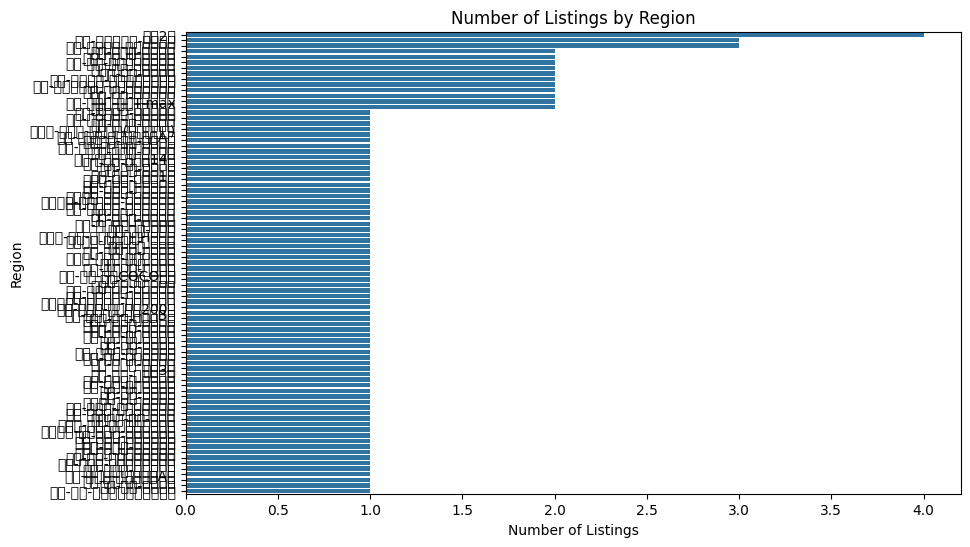

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 房源数量按区域
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Region', data=region_count)
plt.title('Number of Listings by Region')
plt.xlabel('Number of Listings')
plt.ylabel('Region')
plt.show()


### 3.5 条形图展示不同区域的平均租金

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20165 (\N{CJK UNIFIED IDEOGRAPH-4EC5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21097 (\N{CJK UNIFIED IDEOGRAPH-5269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21452 (\N{CJK UNIFIED IDEOGRAPH-53CC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27969 (\N{

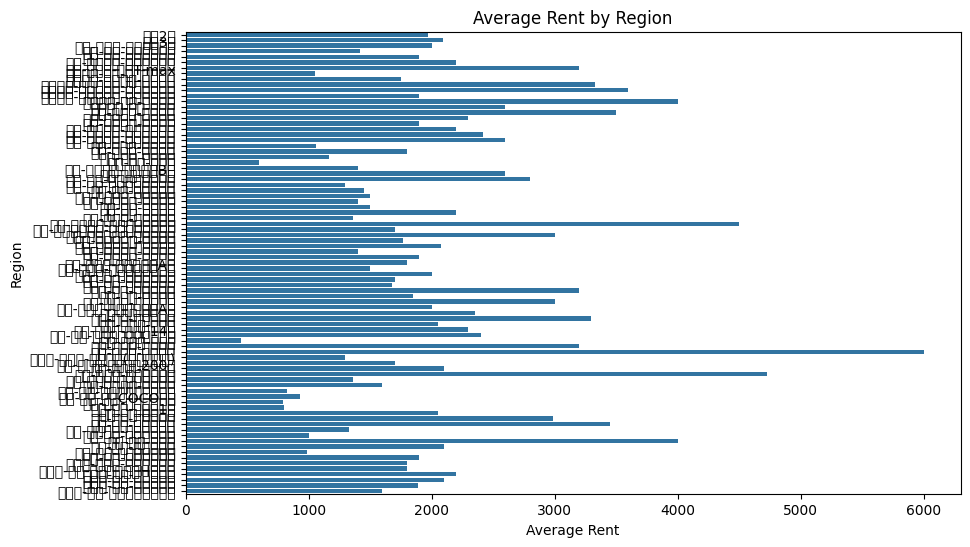

In [22]:
# 平均租金按区域
plt.figure(figsize=(10, 6))
sns.barplot(x='Average_Rent', y='Region', data=average_rent)
plt.title('Average Rent by Region')
plt.xlabel('Average Rent')
plt.ylabel('Region')
plt.show()